In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
## We're gonna do some 3-D plots today
from mpl_toolkits.mplot3d import Axes3D

In [31]:
## First off I'm just gonna do something parametric to make a pretty plot :D
t = np.linspace(0,1,1000)
x = np.cos(7*np.pi*t)
y=np.sin(7*np.pi*t)
z=t

In [32]:
fig = plt.figure()
ax = fig.gca(projection='3d')

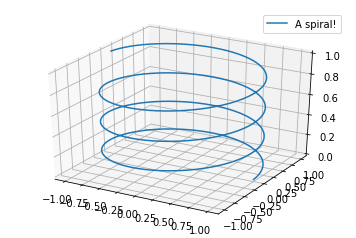

In [33]:
ax.plot(x, y, z, label='A spiral!')
ax.legend()

plt.show()

Coolio! That's some good stuff there! Thanks matplotlib for being awesome. 

After playing around with that some, let's move onto the goal at hand! I'd like to understand multivariate gaussians before trying to move onto some new techniques for Machine Learning. In here, I'm basically just toying around with matrices and plotting to make sure I've got a solid grasp on it in Python. The bulk of my programming with matrices happened in matlab and R so I want to be sure I got it down pat. After all Machine Learning is basically just Linear Algebra on steroids!

In [34]:
mu=np.matrix([0,0]).T ## Our mean vector. This vector is not nice.
X=np.identity(2) ## I_2 our covariance matrix

In [35]:
mu.shape, X.shape

((2, 1), (2, 2))

In [36]:
np.linalg.inv(X) ## Should be I_2

array([[ 1.,  0.],
       [ 0.,  1.]])

In [37]:
np.linalg.det(X) ## Should be 1

1.0

That's actually all we need for this. Let's make a function that computes the value of $N(x|\mu,X)$

In [38]:
n = 2
1.0/((2*np.pi)**(n/2.0)*np.abs(np.linalg.det(X)**0.5))

0.15915494309189535

In [41]:
def whatItBe(x,mu,X):
    """computes the value of the multivariate Normal dist. at x"""
    n = x.shape[1] ## length of vector
    const=1.0/((2*np.pi)**(n/2.0)*np.abs(np.linalg.det(X)**0.5))
    exponent = -0.5*((x-mu).T*np.linalg.inv(X)*(x-mu))
    return(const*np.exp(exponent))

In [43]:
x=np.matrix([0,0]).T
whatItBe(x,mu,X)

matrix([[ 0.39894228]])

I digress a little. I want to know more about this 3d plotting functionality.

In [44]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)

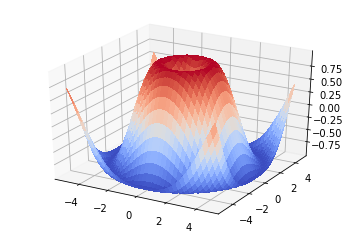

In [46]:
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()

In [52]:
## Hmmm... 
X==Y

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ..., 
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]], dtype=bool)

Alright I understand now! I use lots of '!''s cause they're fun! No but for real, I think I get it now -- Let's see if I actually do though...

In [53]:
def whatItBe(x_val,y_val,mu,X):
    """computes the value of the multivariate Normal dist. at point (x,y). Changed so I can use meshgrid"""
    x=np.matrix([x_val,y_val]).T
    n = x.shape[1] ## length of vector
    const=1.0/((2*np.pi)**(n/2.0)*np.abs(np.linalg.det(X)**0.5))
    exponent = -0.5*((x-mu).T*np.linalg.inv(X)*(x-mu))
    return(const*np.exp(exponent))

In [76]:
Xvals = np.arange(-4, 4, 0.25)
Yvals = np.arange(-4, 4, 0.25)
XX, YY = np.meshgrid(Xvals, Yvals)

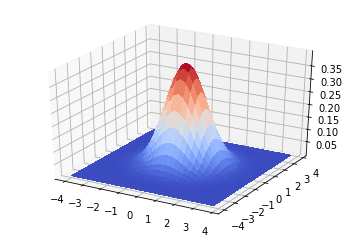

In [77]:
Z=0*XX
for i in range(len(Xvals)):
    for j in range(len(Yvals)):
        Z[i][j]=whatItBe(Xvals[i],Yvals[j],mu=np.matrix([0,0]).T,X=np.identity(2)) 

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(XX, YY, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()

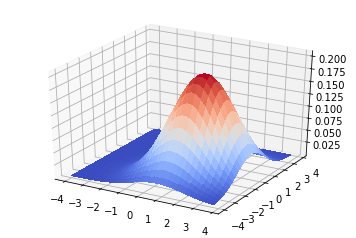

In [80]:
Z=0*XX
for i in range(len(Xvals)):
    for j in range(len(Yvals)):
        Z[i][j]=whatItBe(Xvals[i],Yvals[j],mu=np.matrix([-1,1.5]).T,X=np.matrix([[2,0.5],[0.5,2]])) 

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(XX, YY, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()